In [14]:
import numpy as np
import matplotlib.pylab as plt
from XY_diagonalisation import Computations_XY_model as XY_model
from IPython.display import clear_output
from mpl_toolkits import mplot3d

In [3]:
XY_model.N_size=50001
XY_model.num_data=500
Data=XY_model.Fourier_Parallel_Transform(Ground=False)

In [7]:
M=XY_model.Compute_Density_Matrix_Random_State(Fourier_M=None,Fourier_P=Data[:,:,1].mean(axis=0),L=50)

In [13]:
O_1,S,O_2=XY_model.Compute_svd_Cov_Matrix(Fourier_M=None,Fourier_P=Data[:,:,1].mean(axis=0),L=50)

In [16]:
%matplotlib notebook

<IPython.core.display.Javascript object>


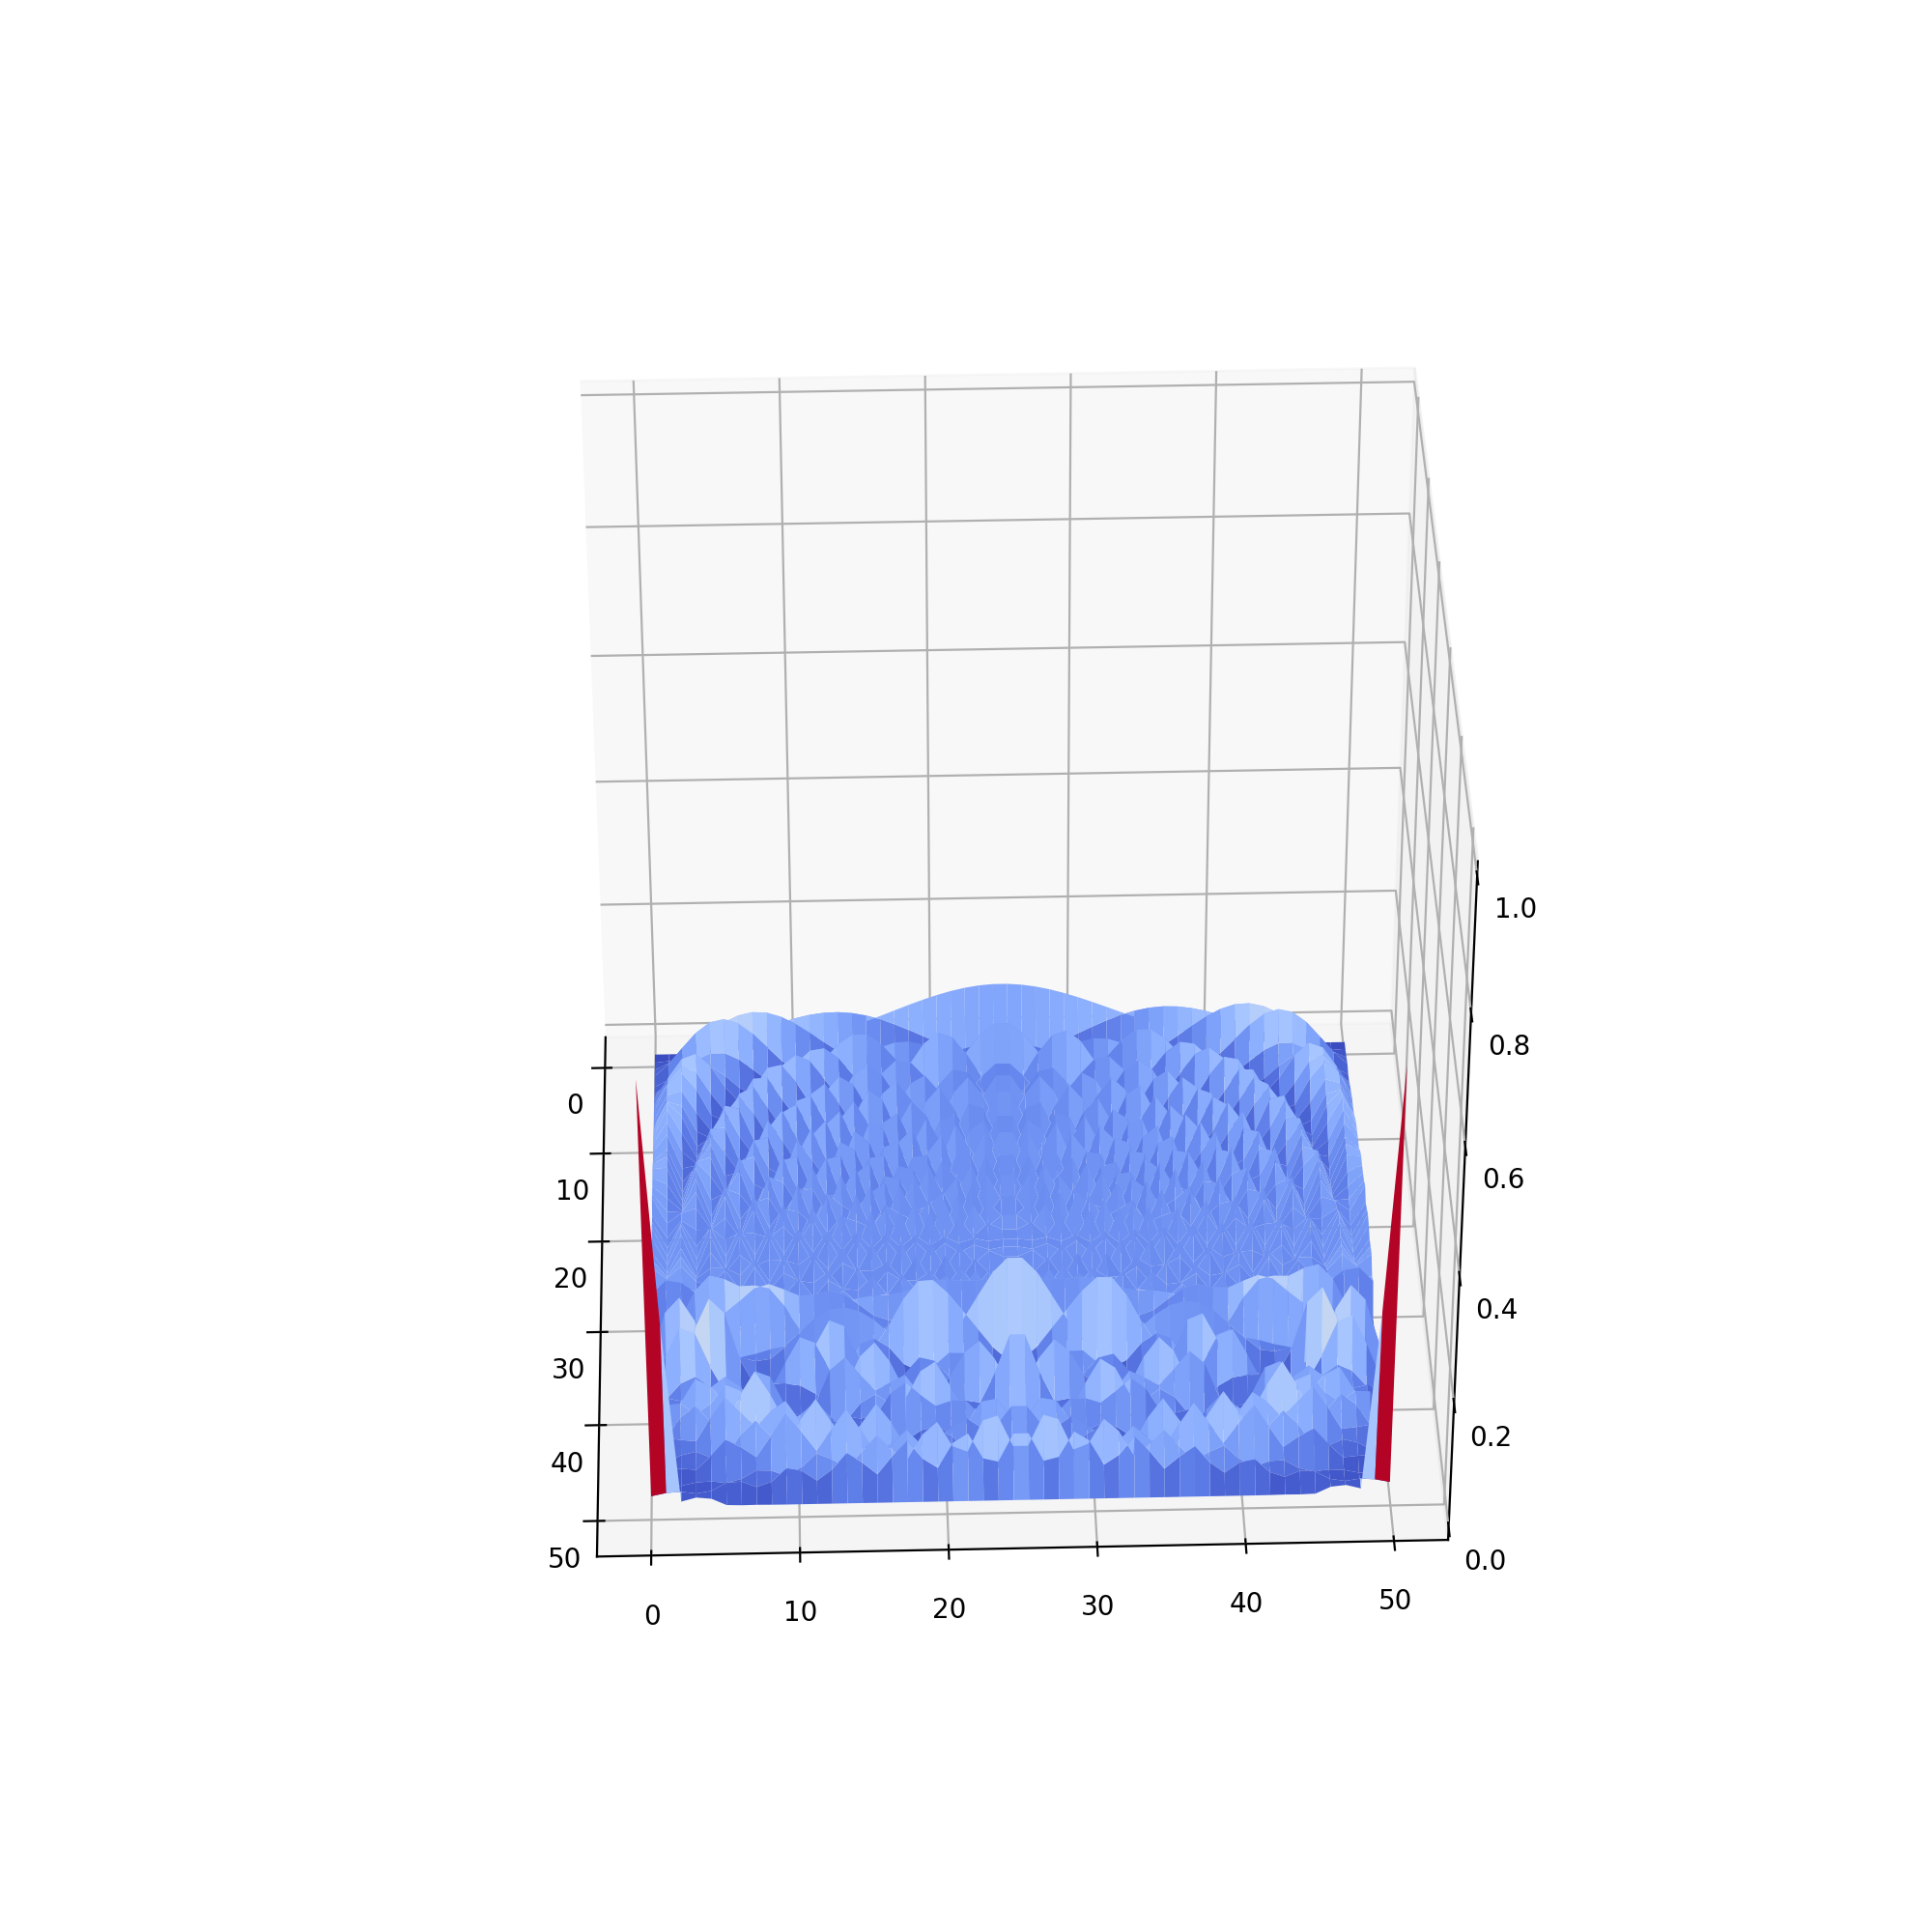

In [20]:
x=np.linspace(0,50)
X,Y = np.meshgrid(x,x)
Z=O_1**2 + O_2.T**2
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='coolwarm')
ax.set_zlim(0,1)
plt.show()

In [23]:
Data=np.zeros((1000001,2))
for name in range(44):
    print(name)
    X_1=np.load(f"Results/Fourier_{name}/Fourier.pkl",allow_pickle=True)
    tmp = X_1.sum(axis=0)
    Data+=tmp/(50*44)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

<IPython.core.display.Javascript object>


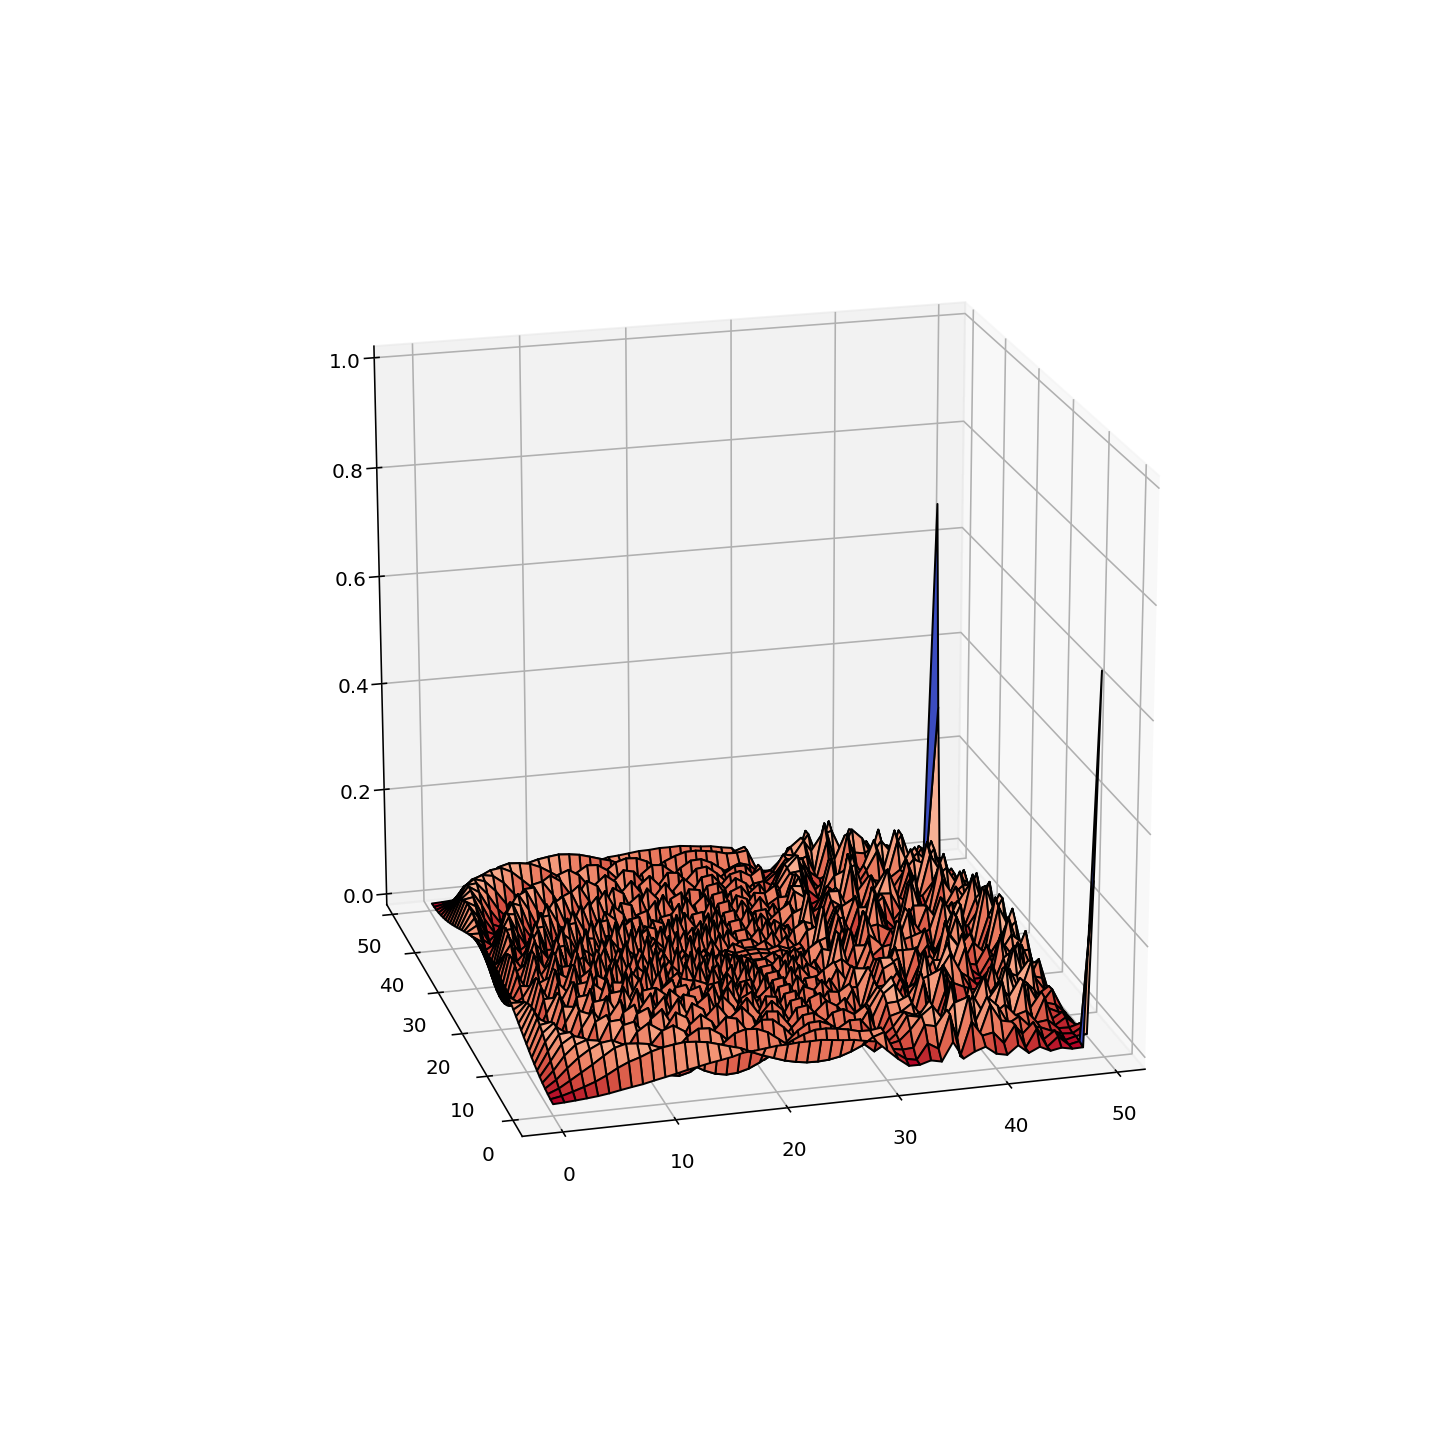

In [43]:
%matplotlib notebook
O_1,S,O_2=XY_model.Compute_svd_Cov_Matrix(Fourier_M=None,Fourier_P=Data[:,1],L=50)
x=np.arange(0,50)
X,Y = np.meshgrid(x,x)
Z=O_1**2 + O_2.T**2
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='coolwarm_r',edgecolor="black")
ax.set_zlim(0,1)
plt.show()

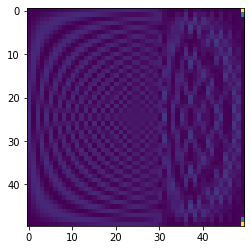

In [44]:
%matplotlib inline
plt.imshow(Z)

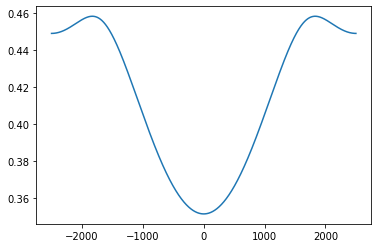

In [65]:

x=np.arange(-sub_size//2,sub_size//2 +1)
plt.plot(x,XY_model.Sample_Fermi_dirac(x,sub_size))

In [66]:
%matplotlib inline

In [67]:
M=XY_model.Covariance_matrix_from_sub_sample(Fourier_minous=Data[0,:,0],Fourier_plus=Data[0,:,1],L=50)
O_1,S,O_2 = np.linalg.svd(M)

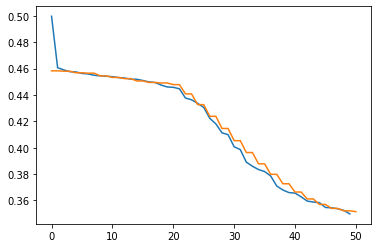

In [75]:
plt.plot((-S+0.5)[::-1])
sub_size=50
x=np.arange(-sub_size//2,sub_size//2 +1)
plt.plot(sorted(XY_model.Sample_Fermi_dirac(x,sub_size),reverse=True))

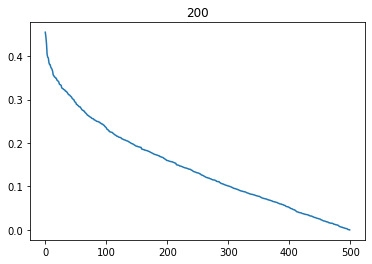

In [36]:
for i in range(10):
    A,S,B=XY_model.Compute_svd_Cov_Matrix(Fourier_M=Data[0,:,0],Fourier_P=Data[0,:,1],L=(i+1)*50)
    plt.plot(S)
    plt.title(str((i+1)*20))
    plt.show()
    clear_output(wait=True)

(array([2.000e+00, 7.700e+01, 1.760e+02, 2.970e+02, 2.504e+03, 1.420e+03,
        1.420e+02, 2.410e+02, 1.310e+02, 1.100e+01]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 <a list of 10 Patch objects>)

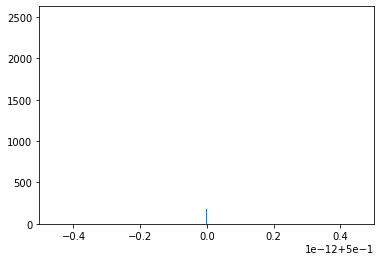

In [22]:
plt.hist(S)

In [31]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d
x= np.linspace(0,0.5,100)
y=np.linspace(0,0.5,100)

In [32]:
X,Y =np.meshgrid(x,y)
Z=(2.0+2.0*X*Y)/(1+2*(X+Y))-1

In [33]:
%matplotlib notebook

<IPython.core.display.Javascript object>


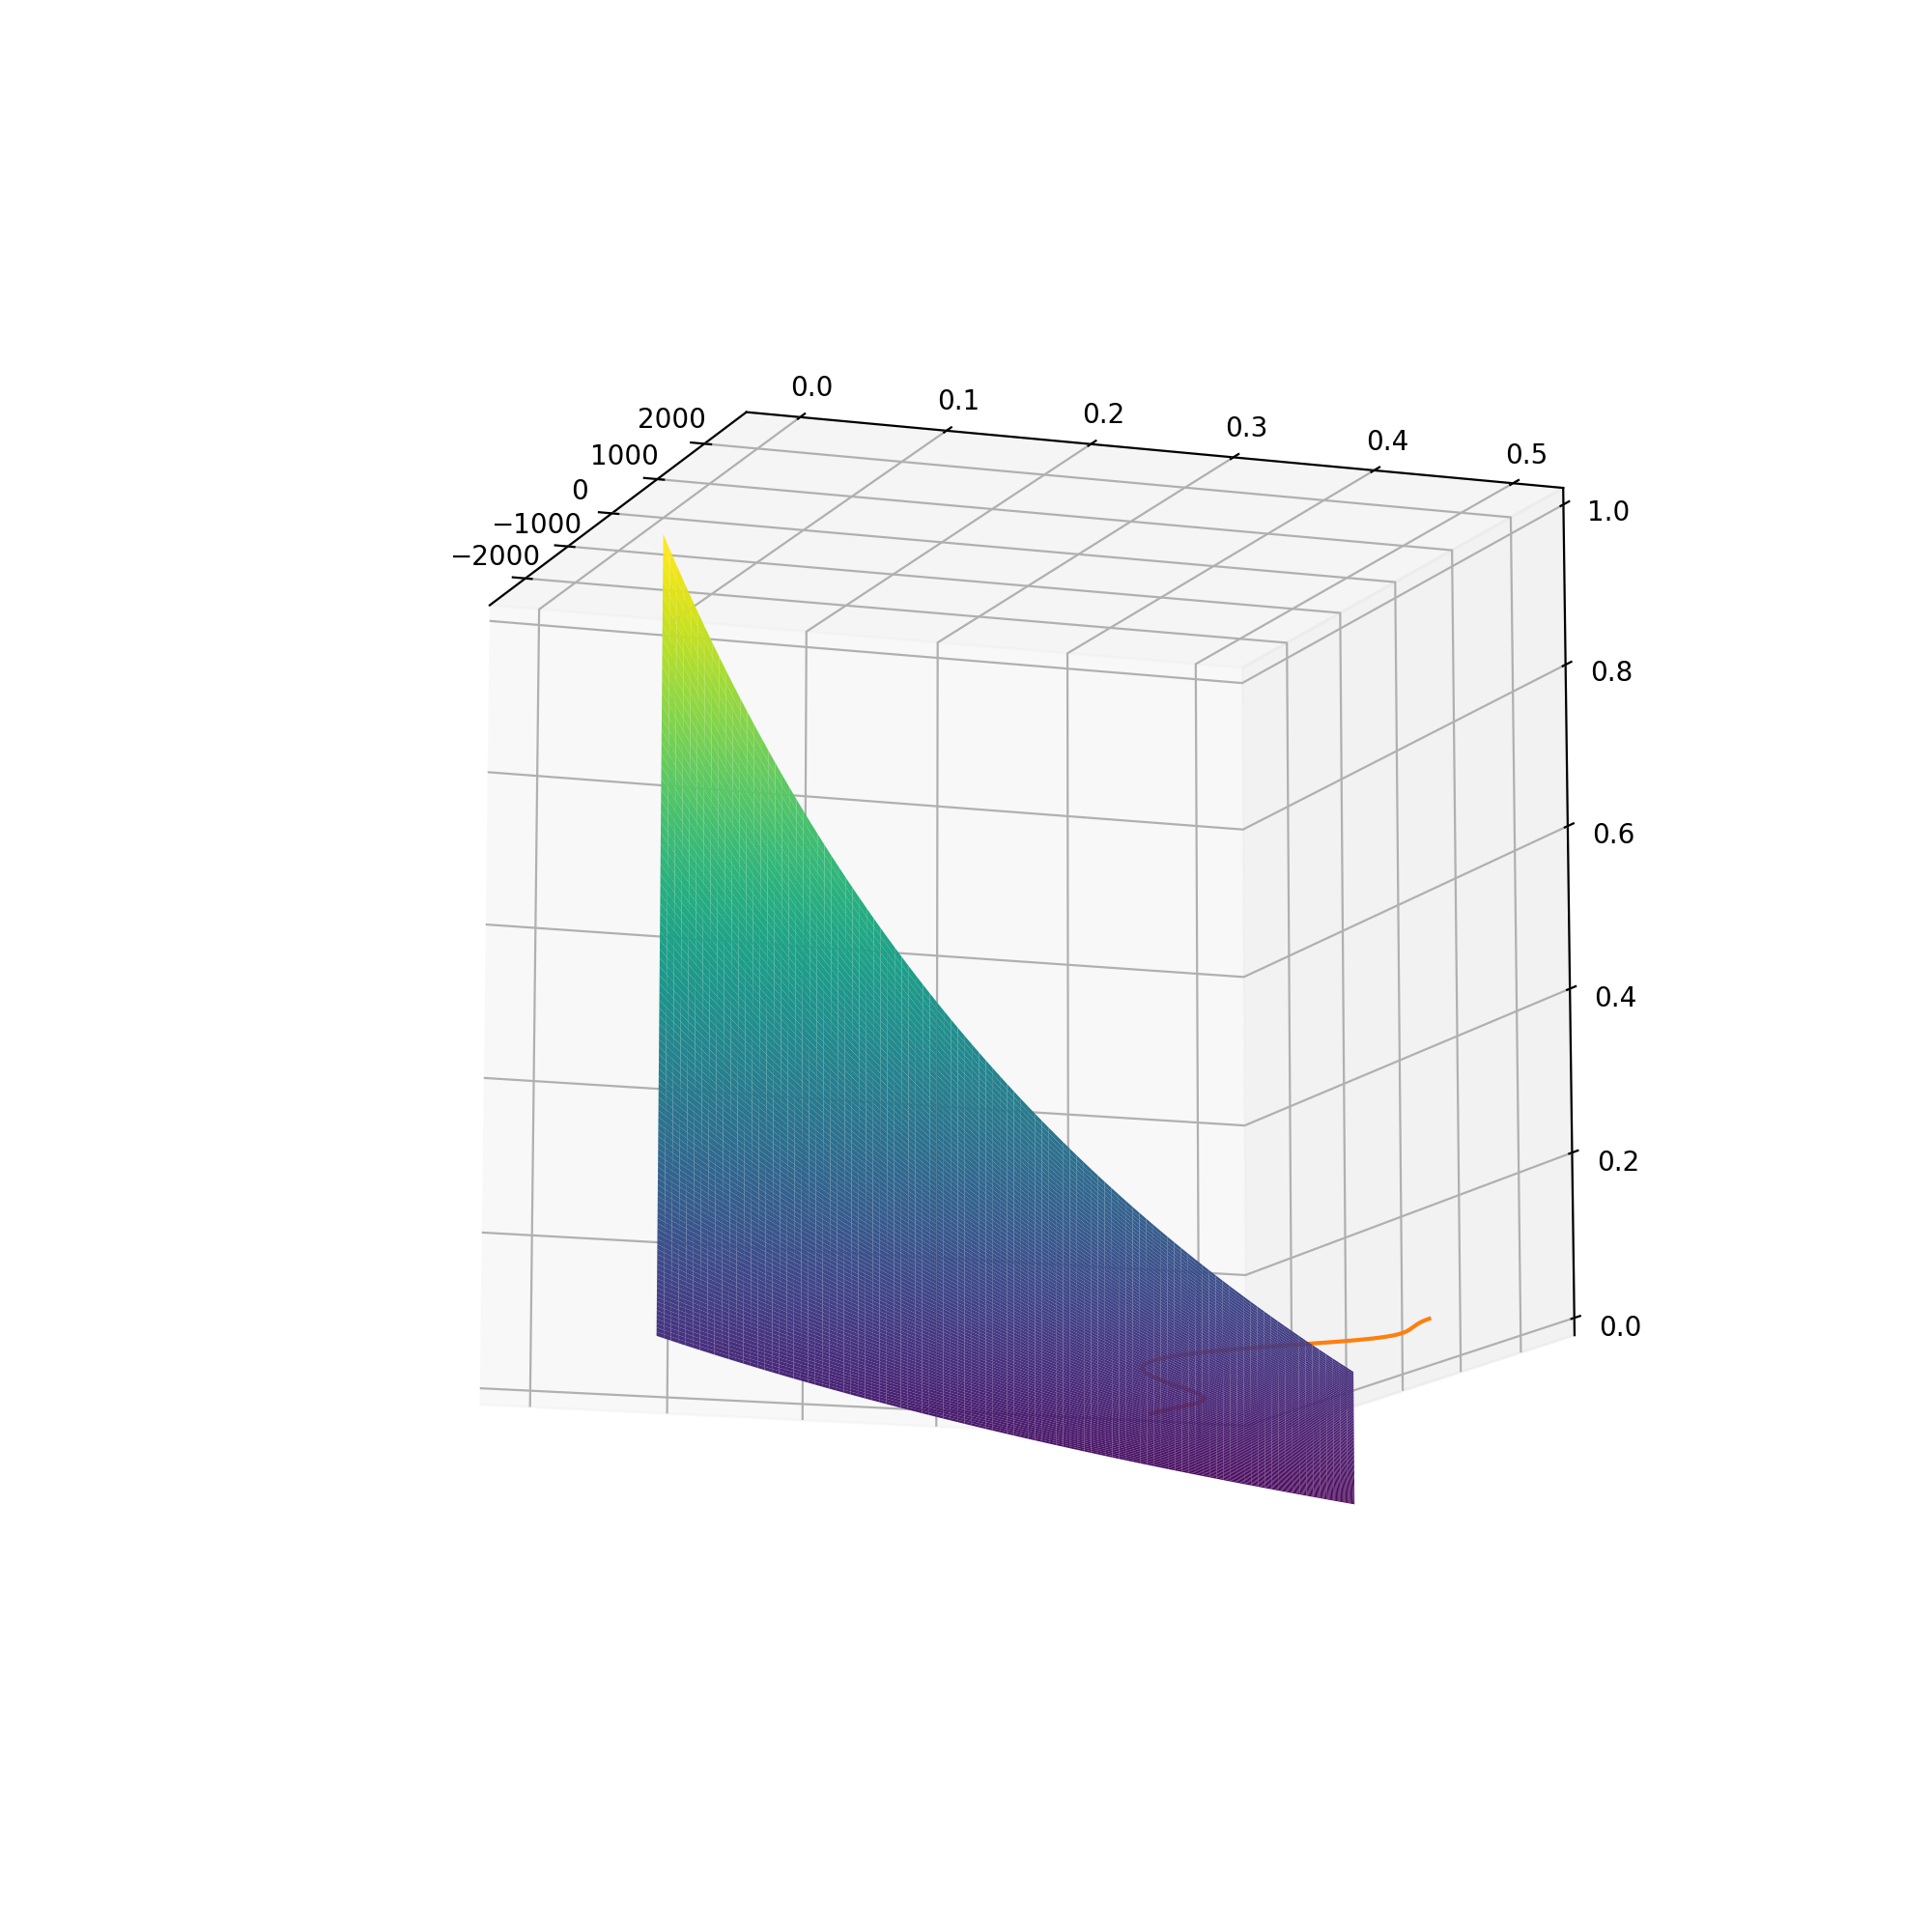

In [36]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_zlim(0,1)
plt.show()

In [26]:
%matplotlib inline

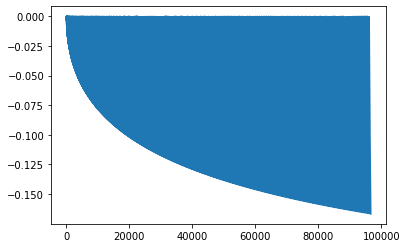

In [27]:
plt.plot(Z[Z<-0])

In [95]:
x= np.linspace(0,0.5,5000)
y=np.linspace(0,0.5,5000)
X,Y =np.meshgrid(x,y)
Z=(2.0+2.0*X*Y)/(1+2*(X+Y))-1
x_1,y_1 = np.where(Z<0)
x_1,y_1=0.5/5000 * x_1,0.5/5000 * y_1
x_2,y_2 = np.where(Z>0)
x_2,y_2=0.5/5000 * x_2,0.5/5000 * y_2

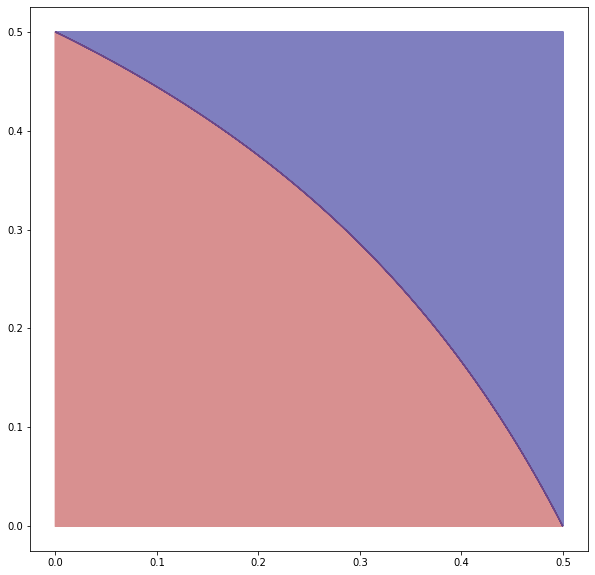

In [96]:
plt.figure(figsize=(10,10))
plt.plot(x_2,y_2,color="firebrick",alpha=0.5)
plt.plot(x_1,y_1,color="navy",alpha=0.5)

In [1]:
Z[np.where(Z==0)]

NameError: name 'Z' is not defined

In [93]:
np.min(Z)

-0.16666666666666663

In [94]:
np.max(Z)

1.0